### Global Mobility dataset


In [101]:
import matplotlib.pyplot as plt

In [103]:
import pandas as pd
DATA_PATH = "data/"
GLOBAL_MOBILITY_DATASET = DATA_PATH + "Global_Mobility_Report.csv.gz"
df_global = pd.read_csv(GLOBAL_MOBILITY_DATASET, compression='gzip')
df_global.head(2)

c:\Users\giann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0


In [104]:
#Get country level data and fill NaN values
italy_data = df_global[df_global['country_region_code'] == 'IT']
italy_data_filtered = italy_data[italy_data['sub_region_1'].isna()] #keep only rows with country level data (for italy only using sub_region_1 is enough)
italy_data_filtered = italy_data_filtered.dropna(axis=1, how='all') #keep only rows without NaN values(should drop all "sub_region"s)
italy_data_filtered = italy_data_filtered.interpolate() #replace NaN values with average of bfill and ffill (No NaN values in this filtered dataframe but not necessarily the case)
italy_data_filtered = italy_data_filtered.set_index(pd.DatetimeIndex(italy_data_filtered['date']))
del italy_data_filtered['date']
italy_data_fitered = italy_data_filtered.drop_duplicates()
italy_data_filtered.head(3)

,country_region_code,country_region,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,
2020-02-15,IT,Italy,3.0,-1.0,35.0,9.0,0.0,-1.0
2020-02-16,IT,Italy,3.0,2.0,26.0,11.0,1.0,-2.0
2020-02-17,IT,Italy,0.0,1.0,7.0,3.0,1.0,0.0


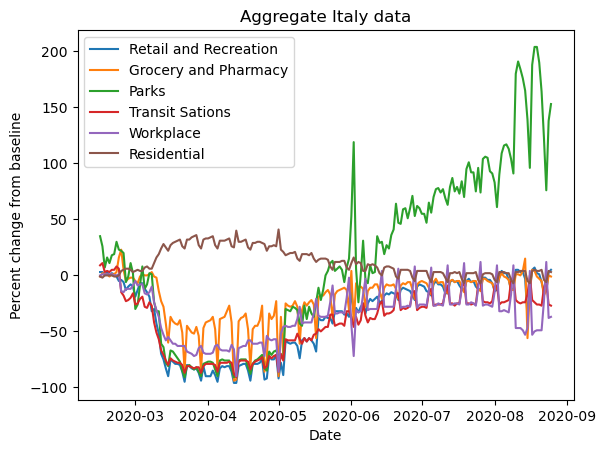

In [105]:
italy_filtered_daily = italy_data_filtered.resample("D").mean() #average per day, and remove all non numerical columns 
plt.plot(italy_filtered_daily)
legend = list(['Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit Sations', 'Workplace', 'Residential'])
#legend = list(italy_filtered_daily.columns)
plt.title("Aggregate Italy data")
plt.legend(legend, loc = "upper left")
plt.ylabel("Percent change from baseline")
plt.xlabel("Date")
plt.show()

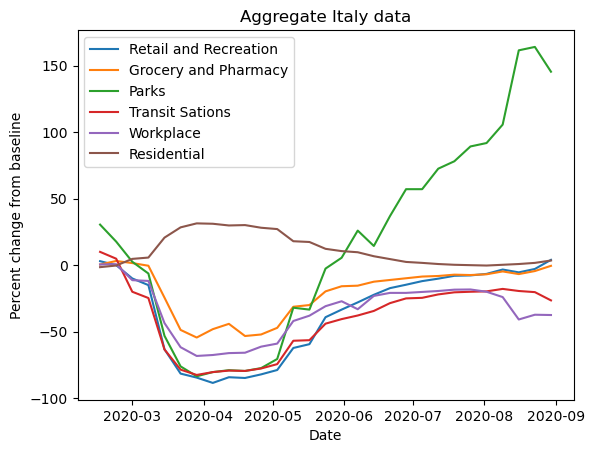

In [106]:
#average over weeks to get smoother graph
italy_filtered_weekly = italy_data_filtered.resample("W").mean() #W of week, M for month
plt.plot(italy_filtered_weekly)
legend = list(['Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit Sations', 'Workplace', 'Residential'])
#legend = list(italy_filtered_daily.columns)
plt.title("Aggregate Italy data")
plt.legend(legend, loc = "upper left")
plt.ylabel("Percent change from baseline")
plt.xlabel("Date")
plt.show()